# Proposed exercise: Higgs to gamma, gamma.

J.A Hernando, Febrero 2024

In [10]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as optimize

# possible styles: ggplot (simplicity), bmh (scientify data). 
plt.style.context('seaborn-colorblind');


**Exercise**  Generate the data using the function in the next cell, *experiment()*. Fit the data to an exponential background plus a gaussian signal the get the number of signal events. You can use as a known parameters the exponential constant, $\tau = 30$, the mean and sigma values of the gaussian $\mu = 125, \sigma = 1.8$. 

Estimate is the data is an observation of the signal, and estimate the CI at 90% CL. Otherwise indicate the upper limit CI on the number of events in the signal at 90 % CL.

This exercise *mimics*, or is a simplified version, of the search $H \to \gamma + \gamma$, donde by CMS and ATLAS during Run-I of the LHC. Considering this exercise as this search, the $x$ value is the invariant mass of the two gammas in an LHC interaction.

In [8]:
def experiment(size = 1, nbkg = 30000, nsig = 400, m0 = 100, tau = 30, msig = 125, ssig = 1.5):
    """ generate data from a exponential + a gaussian signal
    """
    exps = []
    for i in range(size):
        nb = stats.poisson.rvs(nbkg, size = 1)
        xs = stats.expon.rvs(loc = m0, scale = tau, size = nb)
        ns = stats.poisson.rvs(nsig, size = 1)
        ys = msig + ssig * stats.norm.rvs(size = ns)
        zs = np.array(list(xs) + list(ys))
        np.random.shuffle(zs)
        #sel = np.logical_and(zs >= m0, zs < m1)
        #exps.append(zs[sel])
        exps.append(zs)
    if (size == 1): return exps[0]
    return exps


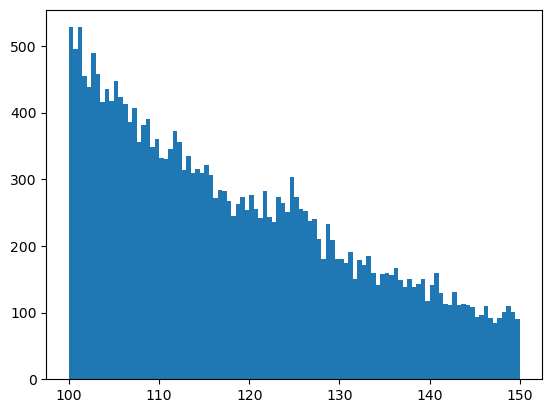

In [9]:
zs = experiment()
plt.hist(zs, range = (100, 150), bins = 100);

You can use different approaches to solve this exercise, for example, consider it as a counting experiment, or use the composite hypothesis testing

You can use the following pdf:

$$
g(x | \mu) = g_{\mathrm{pois}}(n | \mu_1+\mu_2) \left[ (1-\alpha) \, g_{\mathrm{exp}}(x | \tau, \tau_0 = 100) + \alpha \, g_{\mathrm{gaus}}(x | \mu, \sigma) \right]
$$

where, $\mu = (\mu_1, \mu_2)$, and $\mu_1$ is the number of background events, $\mu_1$ the number of signal events, and

 * $\alpha = \frac{\mu_2}{\mu_1+\mu_2}$, the fraction of signal events
 
 * $g_{\mathrm{pois}(n | \mu_1 + \mu_2)}$, is a poisson pmd, where $n$ is the number of observed events, the size of the data
 
 * $g_{\mathrm{exp}(x | \tau, \tau_0 = 100)}$ is as exponential pdf with parameter $\tau$ and that it starts (its origin) at $\tau_0 = 100$, in this case.
 
 * $g_{\mathrm{gaus}}(x | \mu, \sigma)$ is a gaussian pdf with mean $\mu$ and sigma $\sigma$.